## 0. Importing Libraries

In [ ]:
import pandas as pd
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly
import matplotlib.pyplot as plt 


import warnings
warnings.filterwarnings('ignore')


## 1. Defining Functions 

In [ ]:
## Function to get data of a ticker using yahoo finance API. The function also transform the data to the FB Prophet's standards.
def get_yf_data(ticker, period = 'max'):
    
    # Getting data from yahoo Finance API
    ticker = ticker
    ticker_raw = yf.Ticker(ticker)
    
    # Getting the historical data from selected ticker from the chosen period. Period = maximum if not specified
    global ticker_df
    ticker_df = ticker_raw.history( period = period)
    ticker_df.reset_index(inplace=True)
    
    # Selecting only the columns date and close price
    ticker_df.columns = ticker_df.columns.str.lower() 
    columns = ['date', 'close']
    
    # Renaming the columns to match the FB Prophet's requirements
    global prophet_df
    prophet_df = ticker_df[columns]
    prophet_df.rename(columns = {'date':'ds', 'close':'y'}, inplace=True) 


    print("The datasets created are: 'ticker_df' and 'prophet_df'" )
    return None

## Function to split the dataset into train and test, in order to make part of the data invisible to the model 
def split_train_test( df, ndays ):
    
    ndays = ndays
    global df_train
    global df_validation

    df_train = df[:-ndays]
    df_validation = df[-ndays:]

    return None

# 3. Data fetching and treatment

In [ ]:
## Getting data from TESLA using yahoo finance api
get_yf_data('TSLA', period='max')

The datasets created are: 'ticker_df' and 'prophet_df'


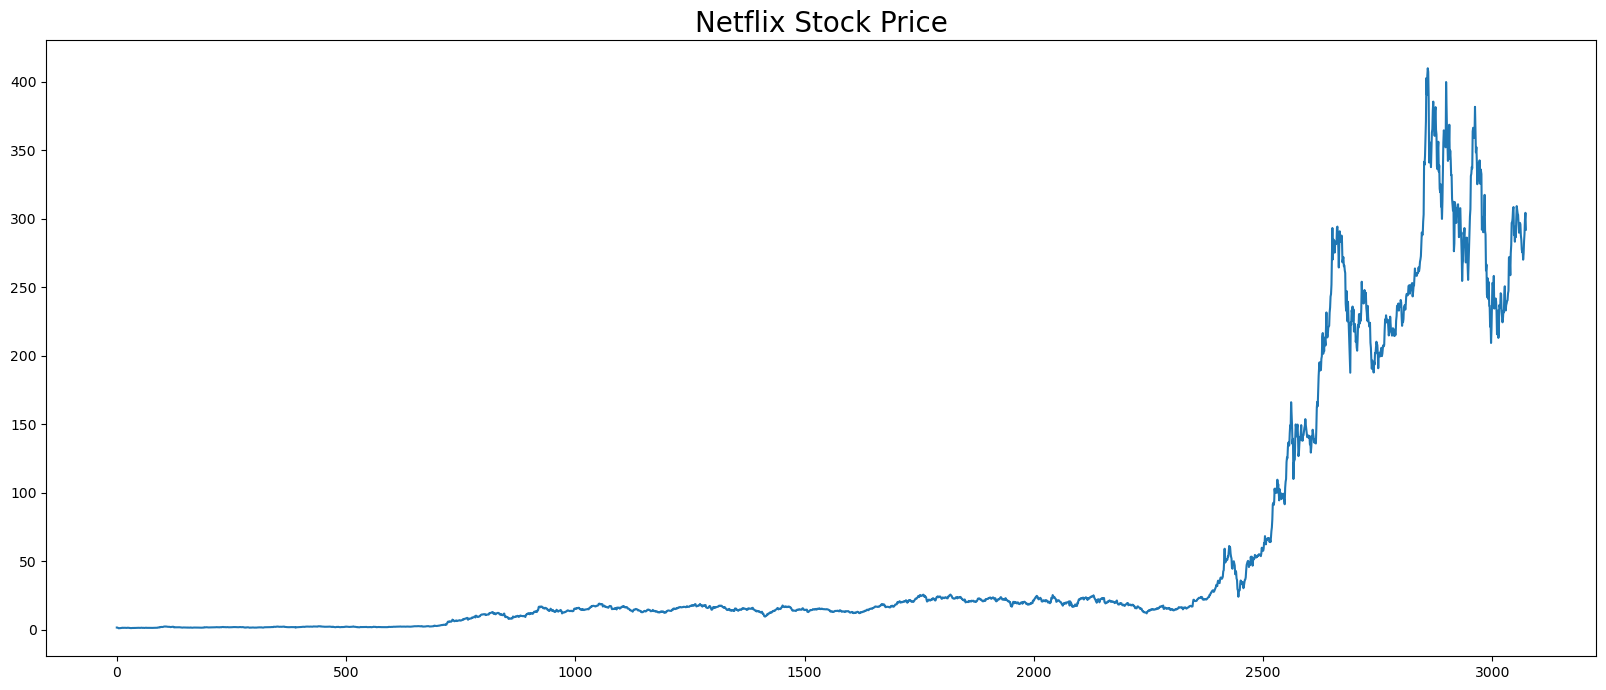

In [ ]:
plt.figure(figsize = (20,8))
plt.title('Netflix Stock Price', size=20)
plt.plot(prophet_df['y']);

In [ ]:
## Splitting the train and test data
split_train_test(prophet_df, ndays=365 )

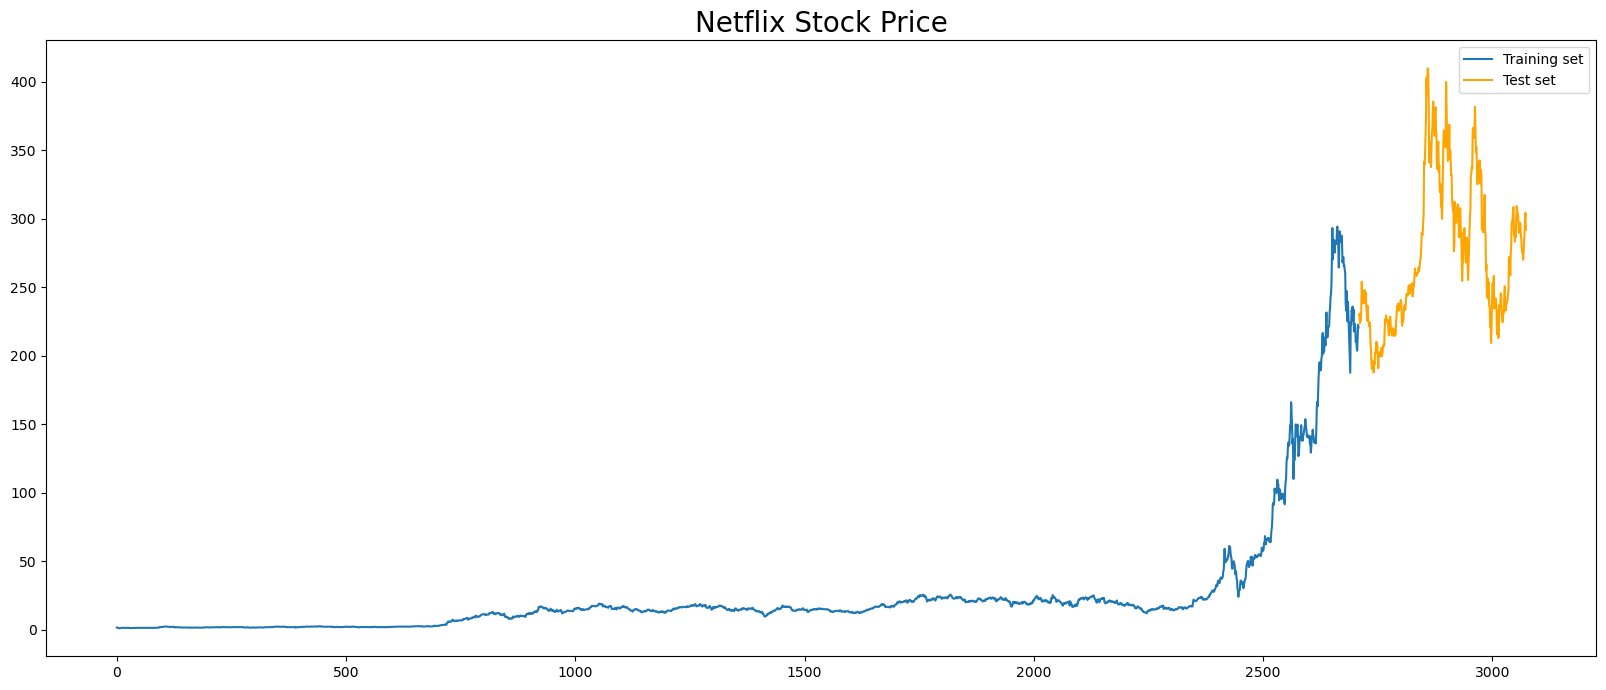

In [ ]:
plt.figure(figsize = (20,8))
plt.title('Netflix Stock Price', size=20)
plt.plot(df_train['y'], label='Training set')
plt.plot(df_validation['y'], label='Test set', color='orange')
plt.legend();

## 4. Creating the model

In [ ]:
m = Prophet(daily_seasonality=True)

In [ ]:
## Training model
m.fit(df_train)

13:34:35 - cmdstanpy - INFO - Chain [1] start processing
13:34:36 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
## Creating future dataframe

future = m.make_future_dataframe(365)

## 5. Predctions

In [ ]:
## Making the predictions
forecast = m.predict(future)

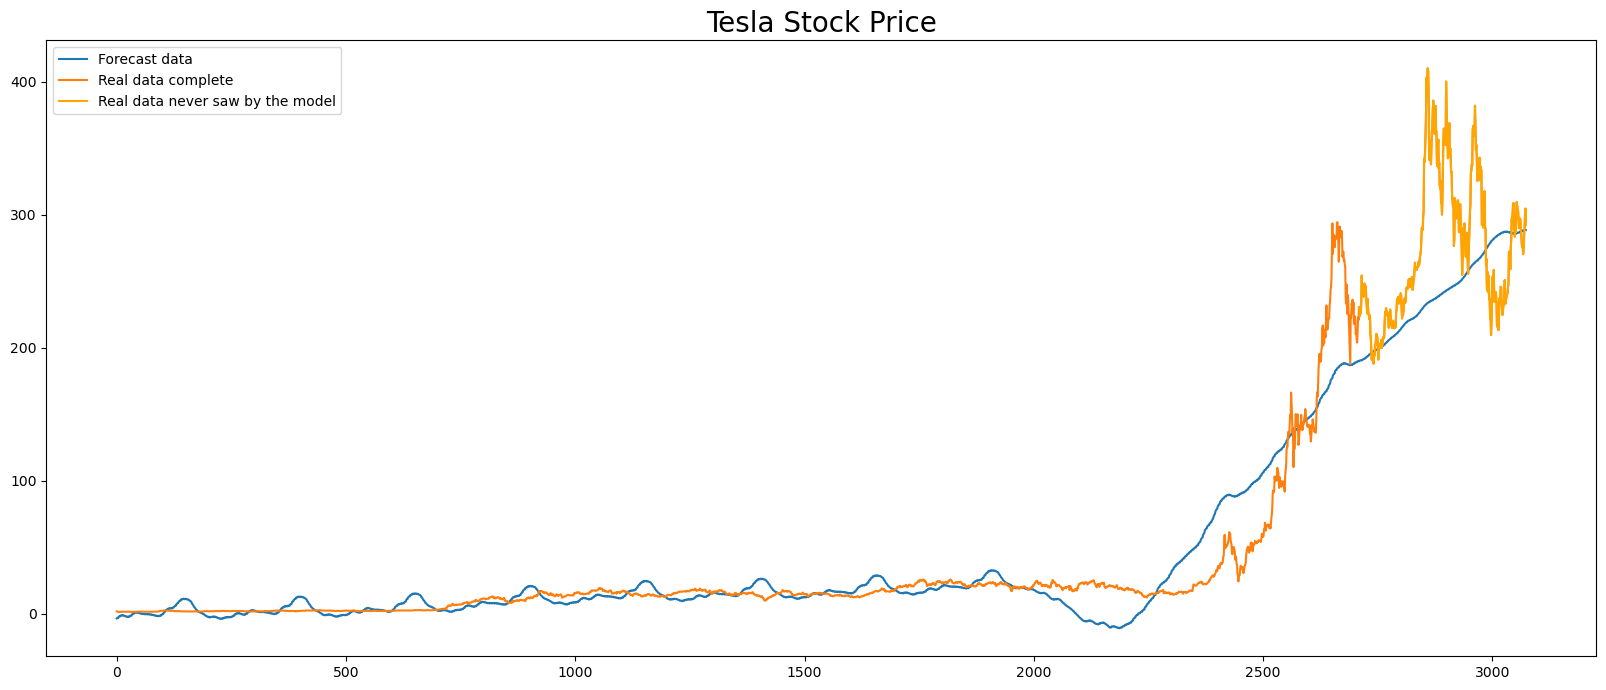

In [ ]:
plt.figure(figsize = (20,8))
plt.title('Tesla Stock Price', size=20)
plt.plot(forecast['yhat'], label='Forecast data')
plt.plot(prophet_df['y'], label='Real data complete')
plt.plot(df_validation['y'], label='Real data never saw by the model', color='yellow')
plt.legend();